In [532]:
from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from scipy.optimize import minimize
from sklearn.cross_validation import train_test_split

class AdaptiveNeaurons(object):
    
    def __init__(self, eta, n_iter):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        # initialize theta 
        initial_theta = np.zeros((X.shape[1], 1))
        
        # compute linear activation
        J_cost = self.activation(X, y, initial_theta)
        
        # short hand for cost function to be minimized
        def costFunc(theta):
            return self.activation(X, y, theta, True)

        # gradient descent 
        results = minimize(costFunc, x0=initial_theta, options={'disp': True, 'maxiter':self.n_iter}, method="L-BFGS-B", jac=True)
        theta = results["x"]
        return theta
        
    def learning_curve(self, X, y, X_train, y_train):
        # number of training examples
        m = len(X)

        # return these values correctly
        error_train = np.zeros((m, 1))
        error_val   = np.zeros((m, 1))
        
        for i in np.arange(1,m+1):
    
            # define training variables for this loop
            X_val = X[:i]
            y_val = y[:i]
            
            # calculate theta from original datset
            theta = self.fit(X_val, y_val)
            
            # plug in theta in original dataset and calculate sum of squared errors            
            error_train[i-1] = self.activation(X_val, y_val, theta)
            
            # plug in same theta in training dataset and calculate sum of squared errors
            error_val[i-1]   = self.activation(X_train, y_train, theta)

        return error_train, error_val
        
    def activation(self, X, y, theta, return_grad=False):
        # number of training examples
        m = len(X)
        theta = np.reshape(theta, (-1,y.shape[1]))
        
        # return these values         
        J = 0
        grad = np.zeros(theta.shape)
        
        # cost function         
        J = (1./(2*m)) * np.power((np.dot(X, theta) - y), 2).sum() 
        
        # calculate partial darivatives of cost function         
        grad = (1./m) * np.dot(X.T, np.dot(X, theta) - y)
        
        if return_grad == True:
            return J, grad.flatten()
        elif return_grad == False:
            return J

In [545]:
# Load the training dataset
data = np.loadtxt('ex1data1.txt', delimiter=',')
df = pd.DataFrame(data=data, columns= ['feature','target'])

X = df.iloc[:, 0].values
y = df.iloc[:, 1].values

# loading another dataset
# df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
# y = df.iloc[:, 4].values
# y = np.where(y == 'Iris-setosa', -1, 1)
# X = df.iloc[:, 3].values

# split data into training and testing dataset ( might avoid overfitting )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# number of training examples
m_train = X_train.size
m_test = X_test.size

y_train = np.reshape(y_train, (m_train, 1))
y_test = np.reshape(y_test, (m_test, 1))

In [546]:
ann = AdaptiveNeaurons(eta=0.01, n_iter=200)

X_train_padded = np.column_stack((np.ones((m_train, 1)), X_train))
X_test_padded = np.column_stack((np.ones((m_test, 1)), X_test))

theta = ann.fit(X_train_padded, y_train)

predict1 = np.array([1, 3.5]).dot(theta)
print("For population = 35,000, we predict a profit of {:f}".format( float(predict1*10000) ))
predict2 = np.array([1, 7.5]).dot(theta)
print("For population = 75,000, we predict a profit of {:f}".format( float(predict2*10000) ))

For population = 35,000, we predict a profit of 5721.657768
For population = 75,000, we predict a profit of 53606.363366


In [547]:
# Learning Curve for Linear Regression
m = X.shape[0]
error_train, error_val = ann.learning_curve(np.column_stack((np.ones((m,1)), X)), np.reshape(y, (m, 1)), X_train_padded, y_train)

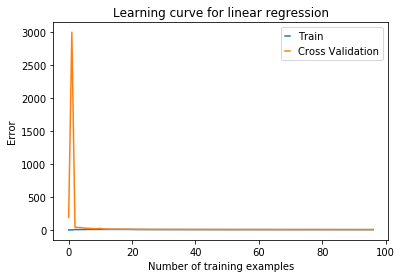

# Training Examples	Train Error	Cross Validation Error

  	1		0.000000	190.982269

  	2		0.000000	2996.413041

  	3		5.677478	40.530016

  	4		4.550745	37.162804

  	5		5.968641	34.312737

  	6		5.199177	28.312343

  	7		8.231089	23.086587

  	8		7.215923	22.761315

  	9		7.161413	19.332940

  	10		7.340599	19.617364

  	11		7.596181	22.395091

  	12		7.299581	14.459058

  	13		7.519034	13.281250

  	14		7.335803	12.192552

  	15		8.083250	11.258875

  	16		7.774410	11.098817

  	17		7.414539	10.858117

  	18		7.592678	11.010607

  	19		7.442405	10.694887

  	20		7.184671	10.322808

  	21		7.051169	10.189865

  	22		6.924515	7.903230

  	23		6.644530	7.823266

  	24		6.390086	7.734528

  	25		6.224286	7.590335

  	26		5.991621	7.722502

  	27		5.782541	7.618900

  	28		5.978191	7.169768

  	29		5.773509	7.196244

  	30		5.603168	7.097131

  	31		5.959866	6.734180

  	32		5.773677	6.730786

  	33		5.713646	6.894096

  	34		5.710990	6.718675

  	35		5.578768	6.641762

  	36		5.552142	6.4

In [548]:
plt.close()

p1, p2 = plt.plot(range(m), error_train, range(m), error_val)
plt.title('Learning curve for linear regression')
plt.legend((p1, p2), ('Train', 'Cross Validation'), numpoints=1, handlelength=0.5)
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.show(block=False)

print('# Training Examples\tTrain Error\tCross Validation Error\n')

for i in xrange(m):
    print('  \t{:d}\t\t{:f}\t{:f}\n'.format(i+1, float(error_train[i]), float(error_val[i])))
    
    